In [1]:
pip install tensorflow keras matplotlib numpy pandas scikit-learn opencv-python


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 4.8 MB/s eta 0:01:22
   ---------------------------------------- 1.8/390.3 MB 4.0 MB/s eta 0:01:37
   ---------------------------------------- 2.6/390.3 MB 4.0 MB/s eta 0:01:38
   ---------------------------------------- 3.4/390.3 MB 3.9 MB/s eta 0:01:40
   ---------------------------------------- 4.2/390.3 MB 3.8 MB/s eta 0:01:42
   ---------------------------------------- 4.7/390.3 MB 3.8 MB/s eta 0:01:42
    --------------------------------------- 5.5/390.3 MB 3.7 MB/s eta 0:01:44
    --------------------------------------- 6.3/390.3 MB 3.7 MB/s eta 0:01:43
    --------------------------------------- 7.1/390.3 MB 3.7 MB/s eta 0:01:43
    --------------------------------------- 7.9/390.3 MB 3.7 MB/s eta 0:01:43
    --------------------------------------- 8.7/390.3 MB 3.8 MB/s eta 0:01:42
    --------------------------------------- 9.4/390.3 MB 3.7 MB/s eta 0

Installed tensorflow and keras for image classification

In [34]:
#Imported required libraries 
import os
import random
import shutil


Code for splitting the data 

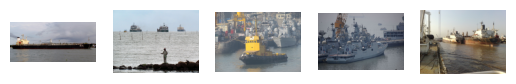

In [16]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the directory path to the simplified dataset
simplified_dataset_dir = 'A:/2025/January 2025/26 Jan/Class1'

# Check if the folder exists
if not os.path.exists(simplified_dataset_dir):
    print(f"Directory does not exist: {simplified_dataset_dir}")
else:
    # For example, display images from Class_1 (Army Ships)
    sample_dir = simplified_dataset_dir  # Directly use Class1 folder path

    # Display a few images from the selected class folder
    for i, img_name in enumerate(os.listdir(sample_dir)[:5]):
        img_path = os.path.join(sample_dir, img_name)
        
        # Ensure the file is an image
        if img_name.lower().endswith(('png', 'jpg', 'jpeg')):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')
        else:
            print(f"Skipping non-image file: {img_name}")
    
    plt.show()



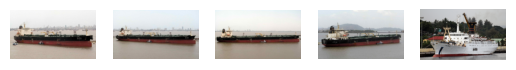

In [17]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the directory path to the simplified dataset
simplified_dataset_dir = 'A:/2025/January 2025/26 Jan/Class2'

# Check if the folder exists
if not os.path.exists(simplified_dataset_dir):
    print(f"Directory does not exist: {simplified_dataset_dir}")
else:
    # For example, display images from Class_1 (Army Ships)
    sample_dir = simplified_dataset_dir  # Directly use Class1 folder path

    # Display a few images from the selected class folder
    for i, img_name in enumerate(os.listdir(sample_dir)[:5]):
        img_path = os.path.join(sample_dir, img_name)
        
        # Ensure the file is an image
        if img_name.lower().endswith(('png', 'jpg', 'jpeg')):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')
        else:
            print(f"Skipping non-image file: {img_name}")
    
    plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Data Augmentation

In [24]:
# Define the paths to the training and validation directories
train_dir = 'A:/2025/January 2025/26 Jan/'  # Update this path to your training data location
val_dir = 'A:/2025/January 2025/26 Jan/'    # Update this path to your validation data location

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,                # Path to the directory containing Class1 and Class2
    target_size=(150, 150),   # Resize images to (150, 150)
    batch_size=32,
    class_mode='binary',      # Binary classification (only 2 classes)
    classes=['Class1', 'Class2'],  # Explicitly specify class names (optional)
    shuffle=True              # Shuffle images for randomness
)

val_generator = val_datagen.flow_from_directory(
    val_dir,                  # Path to the validation directory
    target_size=(150, 150),   # Resize images to (150, 150)
    batch_size=32,
    class_mode='binary',      # Binary classification (only 2 classes)
    classes=['Class1', 'Class2'],  # Explicitly specify class names (optional)
    shuffle=False             # No shuffling for validation set
)

# Optional: Print out the number of images in each class (for debugging)
print(f"Number of images in Class1: {len(os.listdir(os.path.join(train_dir, 'Class1')))}")
print(f"Number of images in Class2: {len(os.listdir(os.path.join(train_dir, 'Class2')))}")




Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Number of images in Class1: 12
Number of images in Class2: 18


Model Building - Use Transfer Learning

In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class
])

base_model.trainable = False  # Freeze the base model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


Train the model

In [26]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


c:\Users\stari\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.4667 - loss: 0.8709 - val_accuracy: 0.6000 - val_loss: 0.6783
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5667 - loss: 0.7308 - val_accuracy: 0.6000 - val_loss: 0.7308
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.7186 - val_accuracy: 0.6000 - val_loss: 0.7228
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6333 - loss: 0.6728 - val_accuracy: 0.6000 - val_loss: 0.6925
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.7216 - val_accuracy: 0.6000 - val_loss: 0.6688
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4333 - loss: 0.7874 - val_accuracy: 0.6000 - val_loss: 0.6706
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.6361 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.6701 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 9/10
1/1

Accuracy is not consistent there might be some issues 

In [27]:
# Unfreeze the top layers of ResNet50 to fine-tune
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom range
    horizontal_flip=True,
    fill_mode='nearest'
)


In [30]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(
    train_generator,
    epochs=6,
    validation_data=val_generator
)


Epoch 1/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.7556 - val_accuracy: 0.6000 - val_loss: 0.6663
Epoch 2/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5667 - loss: 0.7413 - val_accuracy: 0.6000 - val_loss: 0.6662
Epoch 3/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7333 - loss: 0.6188 - val_accuracy: 0.6000 - val_loss: 0.6661
Epoch 4/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6333 - loss: 0.6713 - val_accuracy: 0.6000 - val_loss: 0.6659
Epoch 5/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5667 - loss: 0.7277 - val_accuracy: 0.6000 - val_loss: 0.6657
Epoch 6/6
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5667 - loss: 0.6931 - val_accuracy: 0.6000 - val_loss: 0.6654


Evaluation and Visualization 

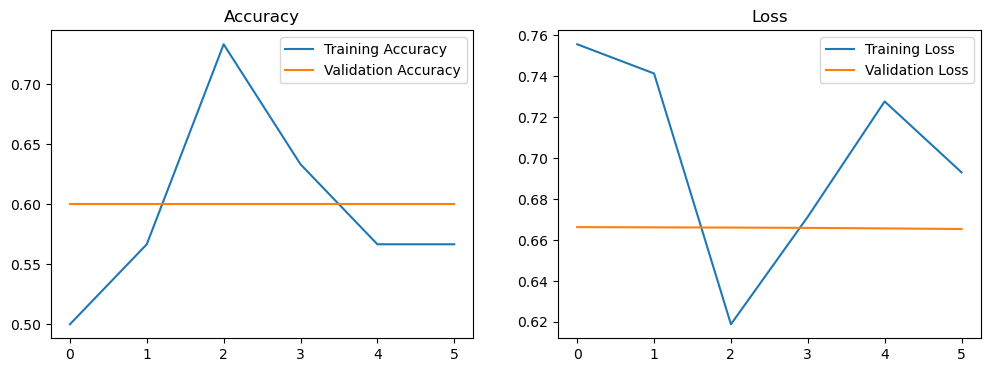

In [32]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.round(y_pred)

print(confusion_matrix(val_generator.classes, y_pred_classes))
print(classification_report(val_generator.classes, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[ 0 12]
 [ 0 18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.60      1.00      0.75        18

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.38        30
weighted avg       0.36      0.60      0.45        30



c:\Users\stari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\stari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\stari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
